In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class channel:
    """The channel class represents the physical voltage inputs for the SLIM instrument.
    The channel class represents a MIPS input."""
    
    def __init__(self, description, voltage):
        self.description = description
        self.voltage = voltage
    
    def set_voltage(self, new_voltage):
        self.voltage = new_voltage

class region:
    """The region class represents the space between two voltage inputs. 
    Over a defined length, the two voltage inputs create the separation field."""
    def __init__(self, description, length, field_strength):
        self.description = description
        self.length = length
        self.field_strength = field_strength
        
    def set_length(self, new_length):
        self.length = new_length
        
    def set_field_strength(self, new_field_strength):
        self.field_strength = new_field_strength
        
    def voltage_drop(self):
        voltage_drop = self.field_strength * self.length
        return voltage_drop

# Define channels

In [28]:
# Define the region and channels of the CIF
CIF = region('CIF', 10.87, 0)
CSSO = channel('CCSO', 0)
CIF_CL = channel('CIFCL', 0)
CIF_dc_out = channel('CIF_dc_out', 0)
CIF_dc_in = channel('CIF_dc_in', 0)

# Define the field strengths and voltage drops of the CIF
CSSO.set_voltage(-110)
CIF.set_field_strength(6)
CIF_CL_to_CCSO_drop = 3
CIF_to_CIF_CL_drop = 2
CIF.set_field_strength(6)

# Define the region and channels of SLIM 2
SLIM2 = region('SLIM2', 38.1, 0)
SLIM2_dc_in = channel('SLIM2_dc_in', 0)
SLIM2_dc_out = channel('SLIM2_dc_out', 0)
SLIM2_8M_SG = channel('8M_SG', 0)

#Define the field strengths and voltage drops
SLIM2.set_field_strength(4)
SLIM2_to_CIF_drop = 5
SLIM2_8M_SG_bias = 4

#Define channels in the interface region
M8_orth_out = channel('M8_orth_out', 0)
M8_orth_in = channel('M8_orth_in', 0)
M8_orth = region('M8_orth', 3.5052, 3.75)

#Define voltage drops
M8_orth_to_SLIM2 = 1

#Define channels in the interface region
M7_orth_out = channel('M7_orth_out', 0)
M7_orth_in = channel('M7_orth_in', 0)
M7_orth = region('M7_orth', 3.5052, 3.75)

#Define drops in the region
M7_to_M8_drop = 0

#Define channels and regions
SLIM1_dc_out = channel('SLIM1_dc_out', 0)
SLIM1_dc_in = channel('SLIM1_dc_in', 0)
SLIM1_7M_SG = channel('SLIM1_dc_in', 0)
SLIM1 = region('SLIM1', 45.72, 4)

#Define interface and voltage drops
SLIM1_to_7M_orth_drop = 1

# Set Voltages

In [32]:
#Set CIF voltages
CIF_CL.set_voltage(CSSO.voltage + CIF_CL_to_CCSO_drop)
CIF_dc_out.set_voltage(CIF_CL.voltage + CIF_to_CIF_CL_drop)
CIF_dc_in.set_voltage(CIF_dc_out.voltage + (CIF.length * CIF.field_strength))

#Set SLIM2 voltages
SLIM2_dc_out.set_voltage(CIF_dc_in.voltage + SLIM2_to_CIF_drop)
SLIM2_dc_in.set_voltage(SLIM2_dc_out.voltage + (SLIM2.field_strength * SLIM2.length))
SLIM2_8M_interface = (SLIM2_dc_in.voltage - (SLIM2.voltage_drop() * (25.5/250)))
SLIM2_8M_SG.set_voltage(SLIM2_8M_interface + SLIM2_8M_SG_bias)

#Set 8M voltages
M8_orth_out.set_voltage(SLIM2_8M_interface + M8_orth_to_SLIM2)
M8_orth_in.set_voltage(M8_orth_out.voltage + M8_orth.voltage_drop())

#Set 7M voltages
M7_orth_out.set_voltage(M8_orth_in.voltage + M7_to_M8_drop)
M7_orth_in.set_voltage(M7_orth_out.voltage + M7_orth.voltage_drop())
SLIM1_7M_interface = M7_orth_in.voltage + SLIM1_to_7M_orth_drop

#Set voltages
SLIM1_dc_out.set_voltage(SLIM1_7M_interface - SLIM1.voltage_drop()*(25.5/250))
SLIM1_dc_in.set_voltage(SLIM1_dc_out.voltage + SLIM1.voltage_drop())

# Plotting

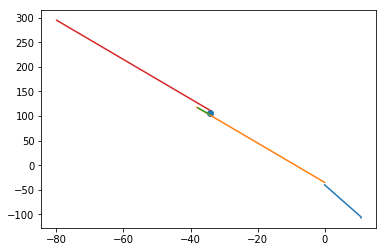

In [33]:
plt.plot([0,10.87,10.87],[CIF_dc_in.voltage,CIF_dc_out.voltage,CIF_CL.voltage])
plt.plot([-38.1,0,], [SLIM2_dc_in.voltage, SLIM2_dc_out.voltage])
plt.scatter([-34.2138],[SLIM2_8M_SG.voltage])
plt.plot([-34.2138, -37.719], [M8_orth_out.voltage, M8_orth_in.voltage])
plt.plot([-34.2138, -79.9338], [SLIM1_dc_out.voltage, SLIM1_dc_in.voltage])

# MIPS dictionary

In [35]:
Falkor_channels = {'channel_1' : CIF_CL}

In [36]:
Falkor_channels['channel_1'].voltage

-107

In [37]:
CIF_CL.set_voltage(0)

In [38]:
Falkor_channels['channel_1'].voltage

0